To: Boost
<br>
From: Morris Lee
<br>
Date: 6 Jan 2023
<br>
Subject: ASSIGNMENT FOR TECHNICAL INTERVIEW (DATA SCIENCE)

#### [1.0 Pre-Processing](#1.0)
* [1.1 Inspect Null Values Distributions](#1.1)
* [1.2 Inspect Distribution of Target Class](#1.2)
* [1.3 Determine which are histogram variabels](#1.3)
* [1.4 Distribution Visualisation](#1.4)
* [1.5 Determine Objectively about Attributes' Skewness](#1.5)
* [1.6 Inspect the only normal distributed variable](#1.6)
* [1.7 Impute Categorical Variable with Mode](#1.7)
* [1.8 Impute all other Left Skewd Variable with Median](#1.8)
* [1.9 Merged back all treated columns](#1.9)
* [1.10 Extract Features and Target](#1.10)
* [1.11 Features Scaling](#1.11)
* [1.12 Dimensionality Reduction](#1.12)
* [1.13 Oversampling or Undersampling using CV](#1.13)


#### [2.0 Modelling](#2.0)
* [2.1 Train Test Split](#2.1)
* [2.2 Parametric Modelling](#2.2)
* [2.3 Non-Parametric Modelling](#2.3)
* [2.4 Ensemble Learning Modelling](#2.4)
* [2.5 Overall Training Set Results](#2.5)
* [2.6 Model Visualisation](#2.6)


#### [3.0 Evaluate on Unseen Imported Test Set](#3.0)
* [3.1 Test Set Pre-processing](#3.1)
* [3.1 Test Set Prediction Performance](#3.1)

Overview:

This is a classification machine learning task (APS Failure at Scania Trucks) that involved 171 attributes and 60000 observations. Classification is a type of machine learning that involves predicting a categorical label or class for a given input data. The goal of classification is to accurately predict the class or category of a given data point based on a set of features or attributes. The classes to be predicted are binary values of ('negative', 'positive'). The dataset is a imbalanced data where only 1000 samples belongs to negative class. Hence data has been pre-processed to treat the imbalanced issue. It also involved several modelling technique such as parametric, non-parametric and ensemble learning. The best fitted model was then used to predict on the unseen dataset. The final result was obtained with a very high accuracy

# <b>1.0 <span  style="color:red">|</span> Pre-Processing </b> <a class="anchor" id="1.0"></a>

In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import preprocessing
from tqdm import tqdm

path = "C:\\Users\\Lee Kah Win\\Desktop\\boost_data"
os.chdir(path)
df = pd.read_csv("aps_failure_training_set.csv", skiprows=20)

def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')
def vc(df, column, r=False):
    vc_df = df.reset_index().groupby([column]).size().to_frame('count')
    vc_df['percentage (%)'] = vc_df['count'].div(sum(vc_df['count'])).mul(100)
    vc_df = vc_df.sort_values(by=['percentage (%)'], ascending=False)
    print(f'STATUS: Value counts of "{column}"...')
    display(vc_df)
    if r:
        return vc_df
def inspect_duplications(df):
    num_duplicated = len(df[df.duplicated()])
    print(f'STATUS: There are/is {num_duplicated} duplicated rows')
def inspect_null_columns(df, df_name, target=None):
    if df.isnull().values.any() ==False:
        print(f'STATUS: There is NO ANY null value in dataframe "{df_name}"')
    else:
        if target!=None:
            if (df[target].isna().any()):
                print("STATUS: The target class has null values.")
            else:
                print("STATUS: The target class has no null values.")
        columns = df.columns[df.isna().any()].tolist()
        temp = {}
        for column in columns:
            temp[column] = (len(df) - df[column].count())
        print(f"STATUS: {len(columns)} columns with null values, over a total of {len(df.columns)}")
        return pd.DataFrame(temp, index=[0]).T #temp

# replace na to np.na
df.replace("na", np.nan, inplace=True)
shape(df, 'df')
nulls = inspect_null_columns(df,'df','class')
inspect_duplications(df)
df.head()

STATUS: Dimension of "df" = (60000, 171)
STATUS: The target class has no null values.
STATUS: 169 columns with null values, over a total of 171
STATUS: There are/is 0 duplicated rows


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


# <b>1.1 <span  style="color:red">|</span> Inspect Null Values Distribution </b> <a class="anchor" id="1.1"></a>

,null values per column,percentage of nulls
br_000,49264,0.821067
bq_000,48722,0.812033
bp_000,47740,0.795667
bo_000,46333,0.772217
ab_000,46329,0.772150
...,...,...
by_000,473,0.007883
ci_000,338,0.005633
cj_000,338,0.005633
ck_000,338,0.005633


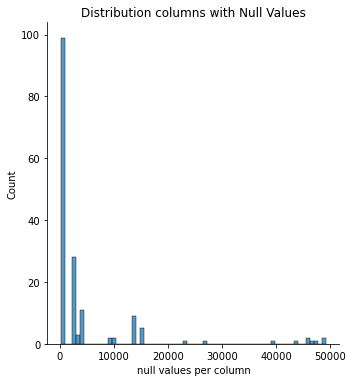

Drop Nulls Columns with over 70%


,null values per column,percentage of nulls
br_000,49264,0.821067
bq_000,48722,0.812033
bp_000,47740,0.795667
bo_000,46333,0.772217
ab_000,46329,0.772150
cr_000,46329,0.772150
bn_000,44009,0.733483


Dropped the following columns: ['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000']
STATUS: Dimension of "df2" = (60000, 164)


In [2]:
nulls_df = nulls.rename(columns = {0:'null values per column'}).sort_values(by = 'null values per column', ascending=False)
nulls_df['percentage of nulls'] = (nulls_df['null values per column'])/len(df)
display(nulls_df)

def vis_dist(df, col, lim=False, max_range=None):
    variable = df[col].values
    ax = sns.displot(variable)
    plt.title(f'Distribution columns with Null Values')
    plt.xlabel(f'{col}')
    if lim:
        plt.xlim(0, max_range)
    return plt.show()
vis_dist(nulls_df, 'null values per column')

print("Drop Nulls Columns with over 70%")
to_drop = nulls_df[nulls_df['percentage of nulls']>0.70]
display(to_drop)


to_drop_columns = to_drop.index.values.tolist()
df2 = df.drop(to_drop_columns, axis=1)
print(f"Dropped the following columns: {to_drop_columns}")
shape(df2,'df2')

# <b>1.2 <span  style="color:red">|</span> Inspect Distribution of Target Class </b> <a class="anchor" id="1.2"></a>

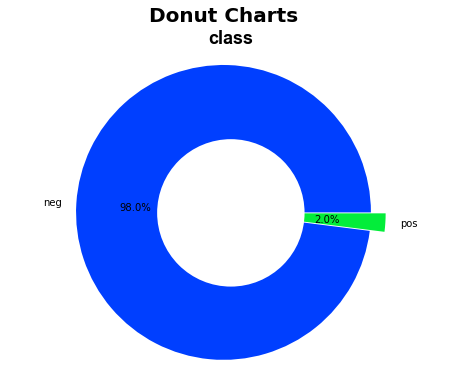

neg    59000
pos     1000
Name: class, dtype: int64


In [3]:
plt.style.use('seaborn-bright')
def pie(df, column):

    fig, axs = plt.subplots()
    fig = matplotlib.pyplot.gcf()
    fig.subplots_adjust(wspace=0.1)
    fig.set_size_inches(8, 6)
    fig.suptitle(f"Donut Charts", fontsize=20,fontweight='bold')
    

    target = column
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = df[target].value_counts().index.tolist()
    sizes = np.rint(df[target].value_counts().values/ df[target].value_counts().values.sum() *100)
    explode = tuple(np.zeros(len(labels))+0.1)

    axs.pie(sizes, labels=labels, autopct='%1.1f%%', radius=2, explode = explode)
    axs.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axs.set_title(f'{target}', fontsize=18, fontname="Arial",fontweight='bold')

    #draw circle
    centre_circle = Circle((0,0),1,fc='white')
    axs.add_patch(centre_circle)
    
    return plt.show()

pie(df, 'class')
print(df['class'].value_counts())

# <b>1.3 <span  style="color:red">|</span> Determine which are histogram variabels </b> <a class="anchor" id="1.3"></a>

In [4]:
X = df2.drop('class', axis=1)
Y = df2[['class']]

float_cols = []
object_cols = []
int_cols = []
for col in tqdm(X.columns):
    try:
        X[col] = pd.to_numeric(X[col])
        if (X[col] % 1 > 0).any():
            # it is float
            float_cols.append(col)
        else:
            int_cols.append(col)
    except:
        object_cols.append(col)
        
print("Continuous Variables")
display(X[float_cols])

print("Discrete Variables")
display(X[int_cols])

if len(object_cols)>1:
    display(X[object_cols])

100%|████████████████████████████████████████████████████████████████████████████████| 163/163 [00:11<00:00, 13.91it/s]


Continuous Variables


,bt_000,ci_000,cj_000,ck_000,ec_00
0,76698.08,5245752.00,0.00,916567.68,2445.80
1,33057.51,2291079.36,0.00,643536.96,2211.76
2,41040.08,2322692.16,0.00,236099.52,1018.64
3,12.69,2135.04,0.00,4525.44,1.08
4,60874.03,3565684.80,0.00,379111.68,1116.06
...,...,...,...,...,...
59995,153001.45,8289544.32,0.00,1529548.80,2912.04
59996,2285.92,123344.64,0.00,11387.52,80.40
59997,112.49,7518.72,4221.12,10493.76,2.76
59998,80292.76,4776505.92,106006.08,1048805.76,1659.70


Discrete Variables


,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


# <b>1.4 <span  style="color:red">|</span> Distribution Visualisation </b> <a class="anchor" id="1.4"></a>

bt_000     6.118994
ci_000     5.836332
cj_000    22.106177
ck_000     8.780391
ec_00      9.785268
dtype: float64


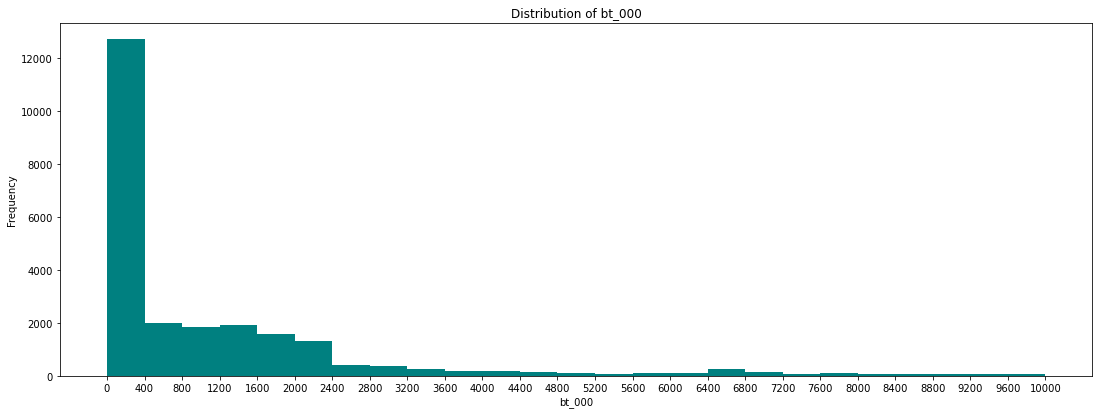

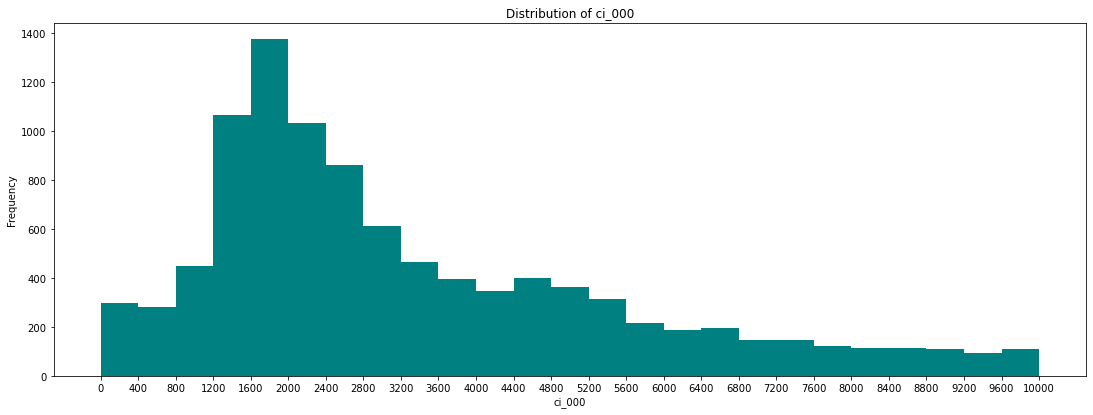

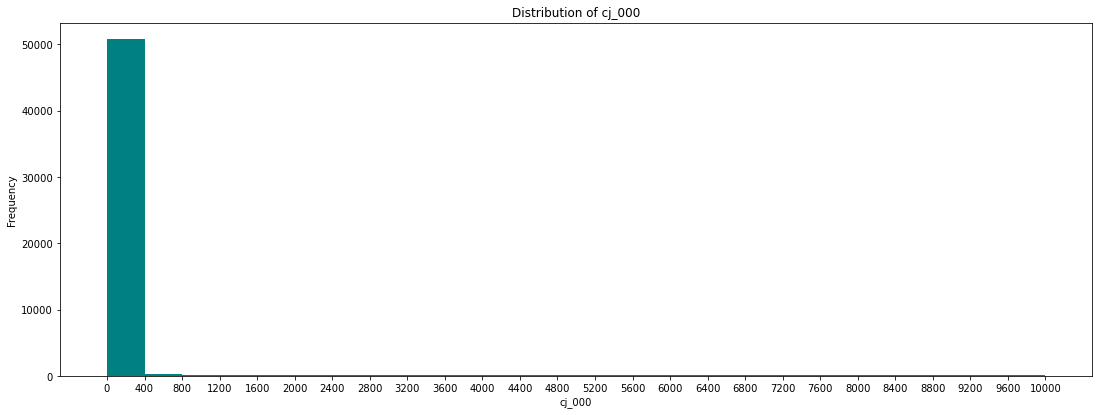

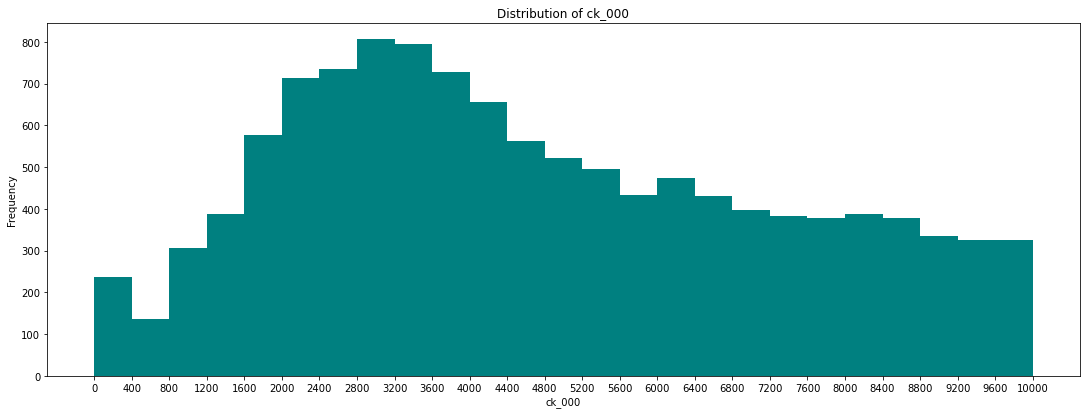

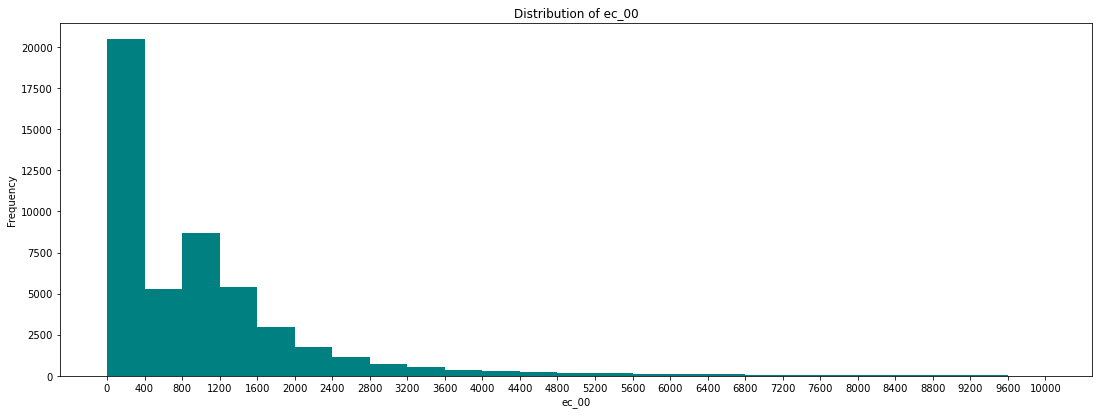

In [5]:
def vis_cluster(df, var):
    
    fig, ax = plt.subplots()
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 6.5)
    
    n_bins = 25
    max_range = 10000
    check_bin = max_range+n_bins
    check_bin2 = int(max_range/n_bins)
    
    ax.hist(df[[var]],bins=n_bins, range = (0, 10000), color = 'teal')
    ax.set_title(f'Distribution of {var}')
    ax.set_xticks(np.arange(0,check_bin,check_bin2))
    ax.set_ylabel(f"Frequency")
    ax.set_xlabel(var)

    return plt.show()
print(X[float_cols].skew(axis = 0, skipna = True))
for col in float_cols:
    vis_cluster(X, col)
    

# <b>1.5 <span  style="color:red">|</span> Determine Objectively about Attributes' Skewness </b> <a class="anchor" id="1.5"></a>

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution (right (positive) skewness or left (negative) skewness). A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [6]:
def extract_skewness(X):
    skewness = X.skew(axis = 0, skipna = True).values
    cols = X.skew(axis = 0, skipna = True).index
    skewdf = pd.DataFrame({'skew value':skewness}, index = cols)
    skewdf['left or right'] = np.nan
    skewdf['left or right'] = skewdf.apply(lambda x: 'left skewed' if x['skew value']>0.5 else x['left or right'], axis=1)
    skewdf['left or right'] = skewdf.apply(lambda x: 'right skewed' if x['skew value']<-0.5 else x['left or right'], axis=1)
    skewdf['left or right'] = skewdf.apply(lambda x: 'normal' if (x['skew value']<=0.5 and x['skew value']>=-0.5)  else x['left or right'], axis=1)
    return skewdf, vc(skewdf, 'left or right')
skewdf = extract_skewness(X)

STATUS: Value counts of "left or right"...


,count,percentage (%)
left or right,,
left skewed,162,99.386503
normal,1,0.613497


# <b>1.6 <span  style="color:red">|</span> Inspect the only normal distributed variable </b> <a class="anchor" id="1.6"></a>

In [7]:
skewdf = skewdf[0]
normal_col = skewdf[skewdf['left or right'] =='normal'].index.values[0]
num_unique_normal_col = len(X[normal_col].dropna().unique())
print(f"Number of unique values in {normal_col} is {num_unique_normal_col}")
display(X[normal_col].head())

X = X.drop(normal_col, axis=1)
X_PREV = X.copy()

ORIGINAL_ARRANGEMENT = X.columns
extract_skewness(X)

Number of unique values in cd_000 is 1


0    1209600.0
1    1209600.0
2    1209600.0
3    1209600.0
4    1209600.0
Name: cd_000, dtype: float64

STATUS: Value counts of "left or right"...


,count,percentage (%)
left or right,,
left skewed,162,100.0


(        skew value left or right
 aa_000    6.115752   left skewed
 ac_000    1.784845   left skewed
 ad_000  212.459406   left skewed
 ae_000   90.588252   left skewed
 af_000   51.671770   left skewed
 ...            ...           ...
 ee_007   15.717250   left skewed
 ee_008   13.426265   left skewed
 ee_009   29.214135   left skewed
 ef_000   73.432440   left skewed
 eg_000   89.029482   left skewed
 
 [162 rows x 2 columns],
 None)

# <b>1.7 <span  style="color:red">|</span> Impute Categorical Variable with Mode </b> <a class="anchor" id="1.7"></a>

In [8]:
CATEGORICAL = []
d = []
for col in X.columns:
    d.append(len(X[col].unique()))

df = pd.DataFrame({'col':X.columns, 'unique_count':d})
bench = df['unique_count'].quantile(0.25)
print(bench)
for col in X.columns:
    if len(X[col].unique()) < bench:
        CATEGORICAL.append(col)
CAT = X[CATEGORICAL]

CAT = CAT.fillna(CAT.mode().iloc[0])
CAT = CAT.astype(int)
CAT

1888.75


,ad_000,ae_000,af_000,ag_000,ag_001,aj_000,ak_000,ar_000,as_000,au_000,...,dg_000,dh_000,dj_000,dk_000,dl_000,dm_000,dz_000,ea_000,ef_000,eg_000
0,280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,68,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,66,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,32
4,458,0,0,0,0,226,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,186,0,0,0,0,280,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,224,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,18,0,0,0,0,0,0,0,0,0,...,7042,0,0,0,0,0,0,0,0,0
59998,494,0,0,0,0,0,0,0,0,0,...,0,190,0,0,0,0,0,0,0,0


# <b>1.8 <span  style="color:red">|</span> Impute all other Left Skewd Variable with Median </b> <a class="anchor" id="1.8"></a>

In [9]:
CAT_COLUMNS = CAT.columns.tolist()
NUMERICAL = X.drop(CAT_COLUMNS, axis=1)
NUMERICAL = NUMERICAL.fillna(NUMERICAL.median())
NUMERICAL

,aa_000,ac_000,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,76698,2.130706e+09,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,...,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0
1,33058,0.000000e+00,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,...,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0
2,41040,2.280000e+02,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,...,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0
3,12,7.000000e+01,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,...,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0
4,60874,1.368000e+03,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,...,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,6.640000e+02,0.0,2564.0,59100.0,1603216.0,6015982.0,1968266.0,164972.0,12560.0,...,1608808.0,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0
59996,2286,2.130707e+09,0.0,0.0,104.0,99186.0,36564.0,128.0,0.0,0.0,...,13934.0,15024.0,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0
59997,112,2.130706e+09,0.0,0.0,28.0,11592.0,11538.0,0.0,0.0,0.0,...,15876.0,2740.0,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0
59998,80292,2.130706e+09,0.0,0.0,330.0,202498.0,3251010.0,2061456.0,360436.0,59754.0,...,1180714.0,1709450.0,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0



# <b>1.9 <span  style="color:red">|</span> Merged back all treated columns </b> <a class="anchor" id="1.9"></a>

In [10]:
df3 = NUMERICAL.join(CAT)
df4 = Y.join(df3)
le = preprocessing.LabelEncoder()
df4['class'] = le.fit_transform(Y.values.ravel())
# just to confirm that the merging is on index, and is right
display(df3[['ad_000', 'aa_000']].head())
display(X_PREV[['ad_000', 'aa_000']].head())
display(df2[['ad_000', 'aa_000', 'class']].tail())

,ad_000,aa_000
0,280,76698
1,0,33058
2,100,41040
3,66,12
4,458,60874


,ad_000,aa_000
0,280.0,76698
1,NaN,33058
2,100.0,41040
3,66.0,12
4,458.0,60874


,ad_000,aa_000,class
59995,186,153002,neg
59996,224,2286,neg
59997,18,112,neg
59998,494,80292,neg
59999,628,40222,neg


### Double Check if Merged Correctly

In [11]:
display(df4[df4['class']==1].head())
display(df2[df2['class']=='pos'].head())

,class,aa_000,ac_000,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,dg_000,dh_000,dj_000,dk_000,dl_000,dm_000,dz_000,ea_000,ef_000,eg_000
9,1,153204,182.0,0.0,11804.0,684444.0,326536.0,31586.0,0.0,0.0,...,0,55760,0,0,0,0,0,0,0,0
23,1,453236,2926.0,222.0,323436.0,2999280.0,20657518.0,12530224.0,913700.0,12670.0,...,0,0,0,0,0,0,0,0,0,0
60,1,72504,1594.0,178226.0,1249396.0,3813464.0,4876588.0,1202196.0,80186.0,5892.0,...,0,0,0,0,0,0,0,0,0,0
115,1,762958,152.0,2186308.0,8123016.0,18022646.0,17301098.0,6753568.0,649400.0,33662.0,...,0,0,0,0,0,0,0,0,0,0
135,1,695994,152.0,0.0,55620.0,1190014.0,2406704.0,2654968.0,190640.0,6104.0,...,0,0,0,0,0,0,0,0,0,0


,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
9,pos,153204,182,NaN,0,0,0,0,0,11804,...,129862,26872,34044,22472,34362,0,0,0,0,0
23,pos,453236,2926,NaN,0,0,0,0,222,323436,...,7908038,3026002,5025350,2025766,1160638,533834,493800,6914,0,0
60,pos,72504,1594,1052,0,0,0,244,178226,1249396,...,1432098,372252,527514,358274,332818,284178,3742,0,0,0
115,pos,762958,NaN,NaN,NaN,NaN,776,281128,2186308,8123016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,pos,695994,NaN,NaN,NaN,NaN,0,0,0,55620,...,1397742,495544,361646,28610,5130,212,0,0,NaN,NaN


# <b>1.10 <span  style="color:red">|</span> Extract Features and Target </b> <a class="anchor" id="1.10"></a>

In [12]:
def extract_X_y(df, target_variable):
    y = df[target_variable].values
    X = df.drop(columns = [target_variable])
    return X, y

X, Y = extract_X_y(df4, 'class')

# <b>1.11 <span  style="color:red">|</span> Features Scaling </b> <a class="anchor" id="1.11"></a>

Feature scaling is the process of standardizing or normalizing the features of a dataset. It is often used in machine learning to ensure that all the features are on the same scale and have similar statistical properties, such as mean and variance.

There are several reasons why feature scaling is important:

Improved model performance: Some machine learning algorithms, such as k-nearest neighbors and support vector machines, are sensitive to the scale of the features in the dataset and can perform poorly if the features are not on the same scale. Feature scaling can improve the performance of these algorithms by ensuring that the features are on the same scale.

Reduced computational complexity: Some machine learning algorithms, such as gradient descent, can be sensitive to the scale of the features and can require a lot of computation to converge to a solution. Feature scaling can reduce the computational complexity of these algorithms by scaling the features to a similar range.

Improved interpretability: Feature scaling can also make it easier to interpret the results of the model, as the scale of the features will be similar and the coefficients of the model will be easier to compare.

Overall, feature scaling is an important preprocessing step that can improve the performance and interpretability of many machine learning algorithms.

One can use normalisation or standardisation to scale the data. Ideally, we can put it under cross validation to determine which scaled dataset can perform better, in which the code as shown in commented format below.

In [13]:
# model = RandomForestClassifier(random_state=RANDOM_NUMBER)

# print("10 fold cross validation, where the higher the value, the better, this is because the MAE is negated")
# print()

# # normalisation (min max scalling)
# print("normalisation (min max scalling)")
# normalized_X = (X_binary_o-X_binary_o.min())/(X_binary_o.max()-X_binary_o.min())
# norm_score = cross_validation(model, normalized_X, y_binary_o)

# # standardisation
# print("standardisation")
# standardized_X = (X_binary_o-X_binary_o.mean())/X_binary_o.std()
# std_score = cross_validation(model, standardized_X, y_binary_o)

# if norm_score> std_score:
#     print(f"Normalisation is better than standardisation, where {norm_score}>{std_score}")
#     print("Normalisation is chosen")
#     X_train, X_test, y_train, y_test = split_data(normalized_X, y)
# else:
#     print(f"Standardisation is better than normalisation, where {std_score}>{norm_score}")
#     print("Standardisation is chosen")
#     X_train, X_test, y_train, y_test = split_data(standardized_X, y)


X_scaled = (X-X.mean())/X.std()
X_scaled

,aa_000,ac_000,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,...,dg_000,dh_000,dj_000,dk_000,dl_000,dm_000,dz_000,ea_000,ef_000,eg_000
0,0.119380,2.310205,-0.056928,-0.115642,-0.167273,0.103185,0.518097,0.362189,-0.042458,-0.029978,...,-0.025983,-0.008116,-0.008511,-0.026998,-0.025164,-0.027578,-0.019481,-0.028615,-0.020257,-0.023540
1,-0.180695,-0.432855,-0.056928,-0.115642,-0.175317,-0.136994,0.018291,0.015307,-0.016214,-0.029978,...,-0.025983,-0.008116,-0.008511,-0.026998,-0.025164,-0.027578,-0.019481,-0.028615,-0.020257,-0.023540
2,-0.125810,-0.432855,-0.056928,-0.115642,-0.182349,-0.224092,0.060103,-0.142808,-0.105853,-0.029978,...,-0.025983,-0.008116,-0.008511,-0.026998,-0.025164,-0.027578,-0.019481,-0.028615,-0.020257,-0.023540
3,-0.407925,-0.432855,-0.056928,-0.115222,-0.182111,-0.337272,-0.423796,-0.349778,-0.160734,-0.029978,...,-0.025983,-0.008116,-0.008511,-0.026998,-0.025164,-0.027578,-0.019481,-0.028615,0.916825,3.685297
4,0.010572,-0.432854,-0.056928,-0.115642,-0.164519,0.267630,0.038747,-0.256765,-0.139779,-0.029978,...,-0.025983,-0.008116,-0.008511,-0.026998,-0.025164,-0.027578,-0.019481,-0.028615,-0.020257,-0.023540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.644059,-0.432854,-0.056928,-0.112257,-0.158020,0.155669,1.122957,1.040878,0.592747,0.044470,...,-0.025983,-0.008116,-0.008511,-0.026998,-0.025164,-0.027578,-0.019481,-0.028615,-0.020257,-0.023540
59996,-0.392288,2.310205,-0.056928,-0.115642,-0.183003,-0.307709,-0.414874,-0.349688,-0.160734,-0.029978,...,-0.025983,-0.008116,-0.008511,-0.026998,-0.025164,-0.027578,-0.019481,-0.028615,-0.020257,-0.023540
59997,-0.407237,2.310205,-0.056928,-0.115642,-0.183035,-0.334696,-0.421310,-0.349778,-0.160734,-0.029978,...,0.008967,-0.008116,-0.008511,-0.026998,-0.025164,-0.027578,-0.019481,-0.028615,-0.020257,-0.023540
59998,0.144093,2.310205,-0.056928,-0.115642,-0.182908,-0.275880,0.411841,1.106720,1.485494,0.324208,...,-0.025983,-0.007765,-0.008511,-0.026998,-0.025164,-0.027578,-0.019481,-0.028615,-0.020257,-0.023540


#### Import modelling packages or libraries

In [14]:
from datetime import datetime
from sklearn.feature_selection import SelectFromModel
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, _tree
from warnings import simplefilter
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.style
from sksurv.nonparametric import kaplan_meier_estimator

# GLOBAL VARIABLES
RANDOM_NUMBER=42
TEST_SIZE_ASSIGNED = 0.20

# <b>1.12 <span  style="color:red">|</span> Dimensionality Reduction </b> <a class="anchor" id="1.12"></a>

Random Forest is a powerful machine learning algorithm that is often used for variable selection. There are several reasons why you might want to use Random Forest for variable selection:

1. Random Forest is a tree-based algorithm, which means it is able to handle high-dimensional data very well and can identify important variables even in datasets with hundreds or thousands of variables.

2. Random Forest is a non-parametric method, which means it does not make any assumptions about the underlying data distribution. This makes it a good choice for variable selection, especially when you have a large number of variables and are not sure which ones are important.

3. Random Forest has a built-in feature selection mechanism, which allows it to identify the most important variables in the dataset. This is done by looking at how much each variable contributes to the overall accuracy of the model.

4. Random Forest is easy to use and can be run with a single line of code in many popular machine learning libraries, such as scikit-learn in Python.

Overall, Random Forest is a powerful and flexible tool for variable selection that can be used in a wide range of applications.

In [15]:
def select_feature_dtc(X, Y):
    # get selector.threshold_
    selector = SelectFromModel(estimator=RandomForestClassifier(random_state=RANDOM_NUMBER)).fit(X, Y)
    print(f'selector.threshold_ = {selector.threshold_}')

    feature_name = X.columns[selector.get_support()]
    print(f'Number of selected features = {feature_name.shape[0]}')

    # put it into a data frame
    d = {'columns': X.columns.tolist(),  'support':selector.get_support()}
    df = pd.DataFrame(data=d)
    df = df[df.support ==True]
    df.reset_index(inplace = True, drop=True)
    print(f'Shape of Df = {df.shape}')
    return df, feature_name
best_feature,feature_name = select_feature_dtc(X_scaled, Y)
print(f"Selected Features: {feature_name}")
X_scaled_dim = X[feature_name]
print("Reduced Dimension")
X_scaled_dim

selector.threshold_ = 0.006172839506172839
Number of selected features = 49
Shape of Df = (49, 2)
Selected Features: Index(['aa_000', 'ag_002', 'ag_003', 'ag_004', 'ag_006', 'ah_000', 'ai_000',
       'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ay_005',
       'ay_006', 'ay_008', 'az_001', 'az_002', 'ba_005', 'bb_000', 'bg_000',
       'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bt_000', 'bu_000', 'bv_000',
       'bx_000', 'by_000', 'cc_000', 'ci_000', 'ck_000', 'cn_001', 'cn_002',
       'cn_004', 'cq_000', 'cs_002', 'cs_004', 'dn_000', 'ee_000', 'ee_002',
       'ee_003', 'ee_004', 'ee_005', 'ee_007', 'ag_001', 'ay_009', 'cn_000'],
      dtype='object')
Reduced Dimension


,aa_000,ag_002,ag_003,ag_004,ag_006,ah_000,ai_000,al_000,am_0,an_000,...,dn_000,ee_000,ee_002,ee_003,ee_004,ee_005,ee_007,ag_001,ay_009,cn_000
0,76698,0.0,0.0,37250.0,3664156.0,2551696.0,0.0,0.0,0.0,4933296.0,...,62282.0,965866.0,1240520.0,493384.0,721044.0,469792.0,157956.0,0,0,0
1,33058,0.0,0.0,18254.0,1720800.0,1393352.0,0.0,0.0,0.0,2560898.0,...,33736.0,664504.0,421400.0,178064.0,293306.0,245416.0,81140.0,0,0,0
2,41040,0.0,0.0,1648.0,1883374.0,1234132.0,0.0,0.0,0.0,2371990.0,...,13876.0,262032.0,277378.0,159812.0,423992.0,409564.0,158022.0,0,0,0
3,12,0.0,318.0,2212.0,1872.0,2668.0,0.0,642.0,3894.0,10184.0,...,232.0,5670.0,240.0,46.0,58.0,44.0,0.0,0,0,0
4,60874,0.0,0.0,43752.0,1800340.0,1974038.0,0.0,0.0,0.0,3230626.0,...,44946.0,404740.0,622012.0,229790.0,405298.0,347188.0,311560.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,0.0,2564.0,59100.0,6015982.0,4880368.0,0.0,1224.0,2114.0,8913782.0,...,62846.0,1608808.0,998500.0,566884.0,1290398.0,1218244.0,717762.0,0,0,0
59996,2286,0.0,0.0,104.0,36564.0,56982.0,0.0,0.0,0.0,123604.0,...,1066.0,13934.0,10578.0,6760.0,21126.0,68424.0,0.0,0,0,0
59997,112,0.0,0.0,28.0,11538.0,8784.0,0.0,0.0,0.0,29698.0,...,622.0,15876.0,792.0,386.0,452.0,144.0,2622.0,0,0,0
59998,80292,0.0,0.0,330.0,3251010.0,2634394.0,0.0,0.0,0.0,4543410.0,...,79230.0,1180714.0,699352.0,222654.0,347378.0,225724.0,165070.0,0,0,0


# <b>1.13 <span  style="color:red">|</span> Oversampling or Undersampling </b> <a class="anchor" id="1.13"></a>

Oversampling and undersampling are two techniques that can be used to address imbalanced datasets, where one class is significantly more or less represented than the other.

Oversampling involves increasing the number of instances of the minority class in the training dataset, while undersampling involves reducing the number of instances of the majority class.

Both techniques can be useful in situations where you have a highly imbalanced dataset and need to balance the class distribution to improve the performance of your model.

However, it's important to be careful when using these techniques, as they can also introduce bias into the model if not used correctly. In particular, oversampling techniques that simply replicate the minority class can create a model that is overly sensitive to the minority class and may not generalize well to new data. Similarly, undersampling techniques that simply remove instances of the majority class can create a model that is overly sensitive to the majority class and may not generalize well to new data.

It's generally a good idea to try both oversampling and undersampling techniques and compare their performance on your dataset to see which one works best.

In [16]:
# OverSampling function
def oversampling(X, y):
    
    print('--------Before OverSampling--------')
    # Before OverSampling
    unique, counts = np.unique(y, return_counts=True)
    print(np.asarray((unique, counts)).T) 

    print('--------After OverSampling--------')
    oversample = SMOTE(random_state=RANDOM_NUMBER)
    X_o, y_o = oversample.fit_resample(X, y)
    unique, counts = np.unique(y_o, return_counts=True)
    print(np.asarray((unique, counts)).T) 
    return X_o, y_o

# Undersampling function
def undersampling(X, y):
    print('--------Before Undersampling--------')
    # Before OverSampling
    unique, counts = np.unique(y, return_counts=True)
    print(np.asarray((unique, counts)).T) 
    
    print('--------After Undersampling--------')
    undersample = RandomUnderSampler(random_state=RANDOM_NUMBER)
    X_u, y_u = undersample.fit_resample(X, y)
    unique, counts = np.unique(y_u, return_counts=True)
    print(np.asarray((unique, counts)).T) 
    return X_u, y_u

def cross_validation_binary(model,X_train,y_train):
    metric_functions = [make_scorer(accuracy_score), make_scorer(precision_score), make_scorer(recall_score),make_scorer(f1_score),make_scorer(roc_auc_score)]
    metric_functions_text = ['accuracy_score', 'precision_score', 'recall_score','f1_score','roc_auc_score']
    model_text_list=[]; metric_list=[]; score_list=[]; std_list=[]
    for metric_function, metric_function_text in zip(metric_functions, metric_functions_text):
        scores = cross_val_score(model, X_train, y_train, cv=10, scoring=metric_function)
        mean = scores.mean()
        std =scores.std()
        model_text_list
        model_text_list.append(model); metric_list.append(metric_function_text);score_list.append(mean);std_list.append(std)
    d = {'model':model_text_list, 'metric': metric_list, '5_cv_score (80% data)': score_list,'5_cv_std (80% data)':std_list}
    df = pd.DataFrame(data=d)
    return df



def oversampling_or_undersampling(X, y):
    # oversampling
    X_o, y_o = oversampling(X, y)
    # undersampling
    X_u, y_u = undersampling(X, y)

    # train test split
    X_trainu, X_testu, y_trainu, y_testu = train_test_split(X_u, y_u,  \
                                                        stratify=y_u,  test_size=TEST_SIZE_ASSIGNED , random_state=RANDOM_NUMBER)
    X_traino, X_testo, y_traino, y_testo = train_test_split(X_o, y_o,  \
                                                        stratify=y_o,  test_size=TEST_SIZE_ASSIGNED , random_state=RANDOM_NUMBER)

    # cross validation
    print(f"staring cross validation for Undersampling - Model Random Forest default, Random State = {RANDOM_NUMBER}")
    df_un = cross_validation_binary(RandomForestClassifier(random_state=RANDOM_NUMBER), X_trainu, y_trainu)
    display(df_un)

    print(f"staring cross validation for Oversampling - Model Random Forest default, Random State = {RANDOM_NUMBER}")
    df_ov = cross_validation_binary(RandomForestClassifier(random_state=RANDOM_NUMBER), X_traino, y_traino)
    display(df_ov)

# # initiate the checking oversampling or undersampling
startTime = datetime.now()
oversampling_or_undersampling(X_scaled_dim, Y)
print(f"duration running: {datetime.now() - startTime}")

--------Before OverSampling--------
[[    0 59000]
 [    1  1000]]
--------After OverSampling--------
[[    0 59000]
 [    1 59000]]
--------Before Undersampling--------
[[    0 59000]
 [    1  1000]]
--------After Undersampling--------
[[   0 1000]
 [   1 1000]]
staring cross validation for Undersampling - Model Random Forest default, Random State = 42


,model,metric,5_cv_score (80% data),5_cv_std (80% data)
0,RandomForestClassifier(random_state=42),accuracy_score,0.958125,0.015065
1,RandomForestClassifier(random_state=42),precision_score,0.948767,0.017740
2,RandomForestClassifier(random_state=42),recall_score,0.968750,0.017002
3,RandomForestClassifier(random_state=42),f1_score,0.958574,0.014950
4,RandomForestClassifier(random_state=42),roc_auc_score,0.958125,0.015065


staring cross validation for Oversampling - Model Random Forest default, Random State = 42


,model,metric,5_cv_score (80% data),5_cv_std (80% data)
0,RandomForestClassifier(random_state=42),accuracy_score,0.995614,0.000616
1,RandomForestClassifier(random_state=42),precision_score,0.993317,0.001382
2,RandomForestClassifier(random_state=42),recall_score,0.997945,0.000758
3,RandomForestClassifier(random_state=42),f1_score,0.995625,0.000612
4,RandomForestClassifier(random_state=42),roc_auc_score,0.995614,0.000616


duration running: 0:44:26.469371


In [17]:
X_binary_o, y_binary_o = oversampling(X_scaled_dim, Y)

--------Before OverSampling--------
[[    0 59000]
 [    1  1000]]
--------After OverSampling--------
[[    0 59000]
 [    1 59000]]


# <b>2.0 <span  style="color:red">|</span> Modelling </b> <a class="anchor" id="2.0"></a>


# <b>2.1 <span  style="color:red">|</span> Train Test Split </b> <a class="anchor" id="2.1"></a>

In [18]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_binary_o, y_binary_o, stratify=y_binary_o, \
                                                    test_size=TEST_SIZE_ASSIGNED, random_state=RANDOM_NUMBER)
def x_train_test_shape(X_train, X_test, y_train, y_test):
    print(f'X_train.shape = {X_train.shape}')
    print(f'X_test.shape = {X_test.shape}')
    print(f'y_train.shape = {y_train.shape}')
    print(f'y_test.shape = {y_test.shape}')

x_train_test_shape(X_train, X_test, y_train, y_test)
unique_test, counts_test = np.unique(y_test, return_counts=True)
unique_train, counts_train = np.unique(y_train, return_counts=True)
print(f'y_test value_counts = {dict(zip(unique_test, counts_test))}')
print(f'y_train value_counts = {dict(zip(unique_train, counts_train))}')

X_train.shape = (94400, 49)
X_test.shape = (23600, 49)
y_train.shape = (94400,)
y_test.shape = (23600,)
y_test value_counts = {0: 11800, 1: 11800}
y_train value_counts = {0: 47200, 1: 47200}


# <b>2.2 <span  style="color:red">|</span> Parametric Modelling </b> <a class="anchor" id="2.2"></a>

Parametric modeling is a type of statistical modeling that involves making assumptions about the functional form of the relationship between the variables in the data. These assumptions are typically based on the form of the distribution of the data and the functional form of the model.

There are several reasons why parametric modeling can be useful:

1. Simplicity: Parametric models are often simpler and easier to interpret than non-parametric models, which can make them easier to use and understand.

2. Computational efficiency: Parametric models often have fewer parameters and are therefore faster to fit and evaluate than non-parametric models.

3. Predictive power: In some cases, parametric models can be more accurate than non-parametric models, especially when the assumptions of the parametric model are reasonable for the data.

4. Statistical inference: Parametric models often allow for more statistical inference, such as hypothesis testing and confidence interval estimation, than non-parametric models.

Overall, parametric modeling can be a useful tool for understanding and predicting relationships in data, but it is important to carefully consider the assumptions of the model and ensure that they are appropriate for the data.

In [19]:
def test_predict(model,X_train,X_test,y_train,y_test):
    startTime = datetime.now()
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    model_text_list=[]; metric_list=[];    score_list=[]
    
    # create list of metric to be examined
    metric_functions = [accuracy_score, precision_score, recall_score,f1_score,roc_auc_score]
    metric_functions_text = ['accuracy_score', 'precision_score', 'recall_score','f1_score','roc_auc_score']
    
    # for loop of each of the 5 metrics
    for metric_function, metric_function_text in zip(metric_functions, metric_functions_text):
        model_text_list.append(model); metric_list.append(metric_function_text); score_list.append(metric_function(y_test, prediction_test))
    
    d = {'model':model_text_list, 'metric': metric_list, 'test predict score (20% data)': score_list}
    df = pd.DataFrame(data=d)
    print(f"duration running: {datetime.now() - startTime}")
    return df

# logistic regression
simplefilter("ignore", category=ConvergenceWarning)
lr = LogisticRegression()

# test predict
lr_test = test_predict(lr,X_train,X_test,y_train,y_test)
display(lr_test)

duration running: 0:00:01.879770


,model,metric,test predict score (20% data)
0,LogisticRegression(),accuracy_score,0.939831
1,LogisticRegression(),precision_score,0.955583
2,LogisticRegression(),recall_score,0.922542
3,LogisticRegression(),f1_score,0.938772
4,LogisticRegression(),roc_auc_score,0.939831


In [20]:
gnb = GaussianNB()

# test predict
gnb_test = test_predict(gnb,X_train,X_test,y_train,y_test)
display(gnb_test)

duration running: 0:00:00.148971


,model,metric,test predict score (20% data)
0,GaussianNB(),accuracy_score,0.919364
1,GaussianNB(),precision_score,0.967413
2,GaussianNB(),recall_score,0.867966
3,GaussianNB(),f1_score,0.914995
4,GaussianNB(),roc_auc_score,0.919364


In [21]:
bnb = BernoulliNB()

# test predict
bnb_test = test_predict(bnb,X_train,X_test,y_train,y_test)
display(bnb_test)

duration running: 0:00:00.127027


,model,metric,test predict score (20% data)
0,BernoulliNB(),accuracy_score,0.855636
1,BernoulliNB(),precision_score,0.860246
2,BernoulliNB(),recall_score,0.849237
3,BernoulliNB(),f1_score,0.854706
4,BernoulliNB(),roc_auc_score,0.855636


# <b>2.3 <span  style="color:red">|</span> Non-Parametric Modelling </b> <a class="anchor" id="2.3"></a>

Non-parametric modeling is a type of statistical modeling that does not make any assumptions about the functional form of the relationship between the variables in the data. This can be useful in situations where the data do not meet the assumptions of parametric models, or when the functional form of the relationship is not known beforehand.

There are several advantages to using non-parametric models:

1. Flexibility: Non-parametric models do not make any assumptions about the functional form of the relationship between the variables, which makes them more flexible and able to capture more complex relationships in the data.

2. Robustness: Non-parametric models are often more robust to violations of the assumptions of parametric models and can still provide good results even when the data do not meet these assumptions.

3. Ability to handle large numbers of variables: Non-parametric models can often handle large numbers of variables without requiring any reduction in the number of variables, which can be useful in high-dimensional data.

4. No need for distributional assumptions: Non-parametric models do not make any assumptions about the distribution of the data, which can be useful in situations where the distribution is unknown or non-normal.

Overall, non-parametric modeling can be a useful tool for understanding and predicting relationships in data, especially when the functional form of the relationship is not known or the data do not meet the assumptions of parametric models.

In [22]:
# 5 fold cross validation
def five_cv_prarm_grid(PARAM_DICT, ESTIMATOR,X_train,y_train):
    sh = HalvingGridSearchCV(ESTIMATOR, PARAM_DICT, cv=10, factor=2, scoring='f1_micro',min_resources="exhaust",random_state=RANDOM_NUMBER,
                              max_resources=50).fit(X_train, y_train)
    print(sh.best_estimator_)
    print(f"10-CV Best Parameters = {sh.best_params_}")
    print(f"10-CV Best Score = {sh.best_score_}")
    return sh.best_estimator_

# KNN Tune Parameter
PARAM_DICT = {'n_neighbors': [5,7,11,13],'weights': ['uniform', 'distance']}
ESTIMATOR =  KNeighborsClassifier()
best_knn_estimator = five_cv_prarm_grid(PARAM_DICT, ESTIMATOR,X_train,y_train)

# test predict
knn_test = test_predict(best_knn_estimator,X_train,X_test,y_train,y_test)
display(knn_test)

KNeighborsClassifier()
10-CV Best Parameters = {'n_neighbors': 5, 'weights': 'uniform'}
10-CV Best Score = 0.925
duration running: 0:00:42.196280


,model,metric,test predict score (20% data)
0,KNeighborsClassifier(),accuracy_score,0.984831
1,KNeighborsClassifier(),precision_score,0.972108
2,KNeighborsClassifier(),recall_score,0.998305
3,KNeighborsClassifier(),f1_score,0.985032
4,KNeighborsClassifier(),roc_auc_score,0.984831


In [23]:
# Decision Tree Tune Parameter
PARAM_DICT = {'max_depth': [None,3,5,7,8,9,15,25,30,35,40,45],'min_samples_split': [2,3,5],'min_samples_leaf':[1,2,4,5]}
ESTIMATOR =  DecisionTreeClassifier(random_state=RANDOM_NUMBER)
best_dtc_estimator = five_cv_prarm_grid(PARAM_DICT, ESTIMATOR,X_train,y_train)

# test predict
dtc_test = test_predict(best_dtc_estimator,X_train,X_test,y_train,y_test)
display(dtc_test)

DecisionTreeClassifier(random_state=42)
10-CV Best Parameters = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
10-CV Best Score = 0.9
duration running: 0:00:07.009641


,model,metric,test predict score (20% data)
0,DecisionTreeClassifier(random_state=42),accuracy_score,0.990593
1,DecisionTreeClassifier(random_state=42),precision_score,0.987290
2,DecisionTreeClassifier(random_state=42),recall_score,0.993983
3,DecisionTreeClassifier(random_state=42),f1_score,0.990625
4,DecisionTreeClassifier(random_state=42),roc_auc_score,0.990593


# <b>2.4 <span  style="color:red">|</span> Ensemble Learning Modelling </b> <a class="anchor" id="2.4"></a>

Ensemble learning is a type of machine learning that involves training multiple models and combining their predictions to make more accurate and robust predictions. There are several reasons why ensemble learning can be useful:

1. Improved accuracy: Ensemble learning can often improve the accuracy of the model by reducing overfitting and improving the generalization of the model to new data.

2. Robustness to noise: Ensemble models can be more robust to noise and other errors in the data, as the errors of individual models may cancel each other out when the predictions are combined.

3. Improved interpretability: Ensemble models can be more interpretable than individual models, as they provide a sense of the relative importance of different features and allow you to see how the predictions of individual models contribute to the overall prediction.

4. Ability to handle complex models: Ensemble learning can allow you to build more complex models by combining the predictions of simpler models, which can be useful in situations where a single complex model may be too difficult to interpret or may overfit the data.

Overall, ensemble learning is a powerful tool that can be used to improve the accuracy and robustness of machine learning models in a wide range of applications.

In [24]:
# RFC Tune Parameter
PARAM_DICT = {'n_estimators': [10,50,100,200,300],'min_samples_leaf':[1,2,3]}
ESTIMATOR =  RandomForestClassifier(random_state=RANDOM_NUMBER)
best_rfc_estimator = five_cv_prarm_grid(PARAM_DICT, ESTIMATOR,X_train,y_train)

# test predict
rfc_test = test_predict(best_rfc_estimator,X_train,X_test,y_train,y_test)
display(rfc_test)

RandomForestClassifier(n_estimators=50, random_state=42)
10-CV Best Parameters = {'min_samples_leaf': 1, 'n_estimators': 50}
10-CV Best Score = 0.95
duration running: 0:00:31.977854


,model,metric,test predict score (20% data)
0,"(DecisionTreeClassifier(max_features='auto', r...",accuracy_score,0.995254
1,"(DecisionTreeClassifier(max_features='auto', r...",precision_score,0.992915
2,"(DecisionTreeClassifier(max_features='auto', r...",recall_score,0.997627
3,"(DecisionTreeClassifier(max_features='auto', r...",f1_score,0.995265
4,"(DecisionTreeClassifier(max_features='auto', r...",roc_auc_score,0.995254


In [25]:
model_voting = VotingClassifier(estimators = [('lr',lr),('gnb', gnb), ('bnb', bnb), \
                                              ('knn', best_knn_estimator), \
                                              ('dt', best_dtc_estimator), ('rf', best_rfc_estimator)], voting = 'soft')

# test predict
voting_test = test_predict(model_voting,X_train,X_test,y_train,y_test)
display(voting_test)

duration running: 0:01:21.056934


,model,metric,test predict score (20% data)
0,"VotingClassifier(estimators=[('lr', LogisticRe...",accuracy_score,0.987669
1,"VotingClassifier(estimators=[('lr', LogisticRe...",precision_score,0.982882
2,"VotingClassifier(estimators=[('lr', LogisticRe...",recall_score,0.992627
3,"VotingClassifier(estimators=[('lr', LogisticRe...",f1_score,0.987730
4,"VotingClassifier(estimators=[('lr', LogisticRe...",roc_auc_score,0.987669


# <b>2.5 <span  style="color:red">|</span> Overall Training Set Results </b> <a class="anchor" id="2.5"></a>

Here is to merged back all the evaluated metrics into one table. It is useful to know which estimator can perform the best.

In [26]:
results_cust = [lr_test, gnb_test,bnb_test,knn_test,dtc_test,
                rfc_test,voting_test]

def concat_results(results_cust):
    temp=[]
    for result in results_cust:
        temp.append(result.pivot(index='model', columns='metric', values='test predict score (20% data)').reset_index())
    merged = pd.concat(temp)
    merged['mean_performance_metric'] = merged.mean(axis=1)
    best_classifier = merged[merged['mean_performance_metric']==merged['mean_performance_metric'].max()].model.values[0]
    display(merged)
    print(f"best_classifier: {best_classifier}")
    return merged, best_classifier

merged_result,best_classifier  = concat_results(results_cust)

C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


metric,model,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,mean_performance_metric
0,LogisticRegression(),0.939831,0.938772,0.955583,0.922542,0.939831,0.939312
0,GaussianNB(),0.919364,0.914995,0.967413,0.867966,0.919364,0.917821
0,BernoulliNB(),0.855636,0.854706,0.860246,0.849237,0.855636,0.855092
0,KNeighborsClassifier(),0.984831,0.985032,0.972108,0.998305,0.984831,0.985021
0,DecisionTreeClassifier(random_state=42),0.990593,0.990625,0.987290,0.993983,0.990593,0.990617
0,"(DecisionTreeClassifier(max_features='auto', r...",0.995254,0.995265,0.992915,0.997627,0.995254,0.995263
0,"VotingClassifier(estimators=[('lr', LogisticRe...",0.987669,0.987730,0.982882,0.992627,0.987669,0.987716


best_classifier: RandomForestClassifier(n_estimators=50, random_state=42)


# <b>2.6 <span  style="color:red">|</span> Model Visualisation </b> <a class="anchor" id="2.6"></a>

# <b>2.6.1 <span  style="color:red">|</span> Decision Tree Visualisation </b> <a class="anchor" id="2.6"></a>

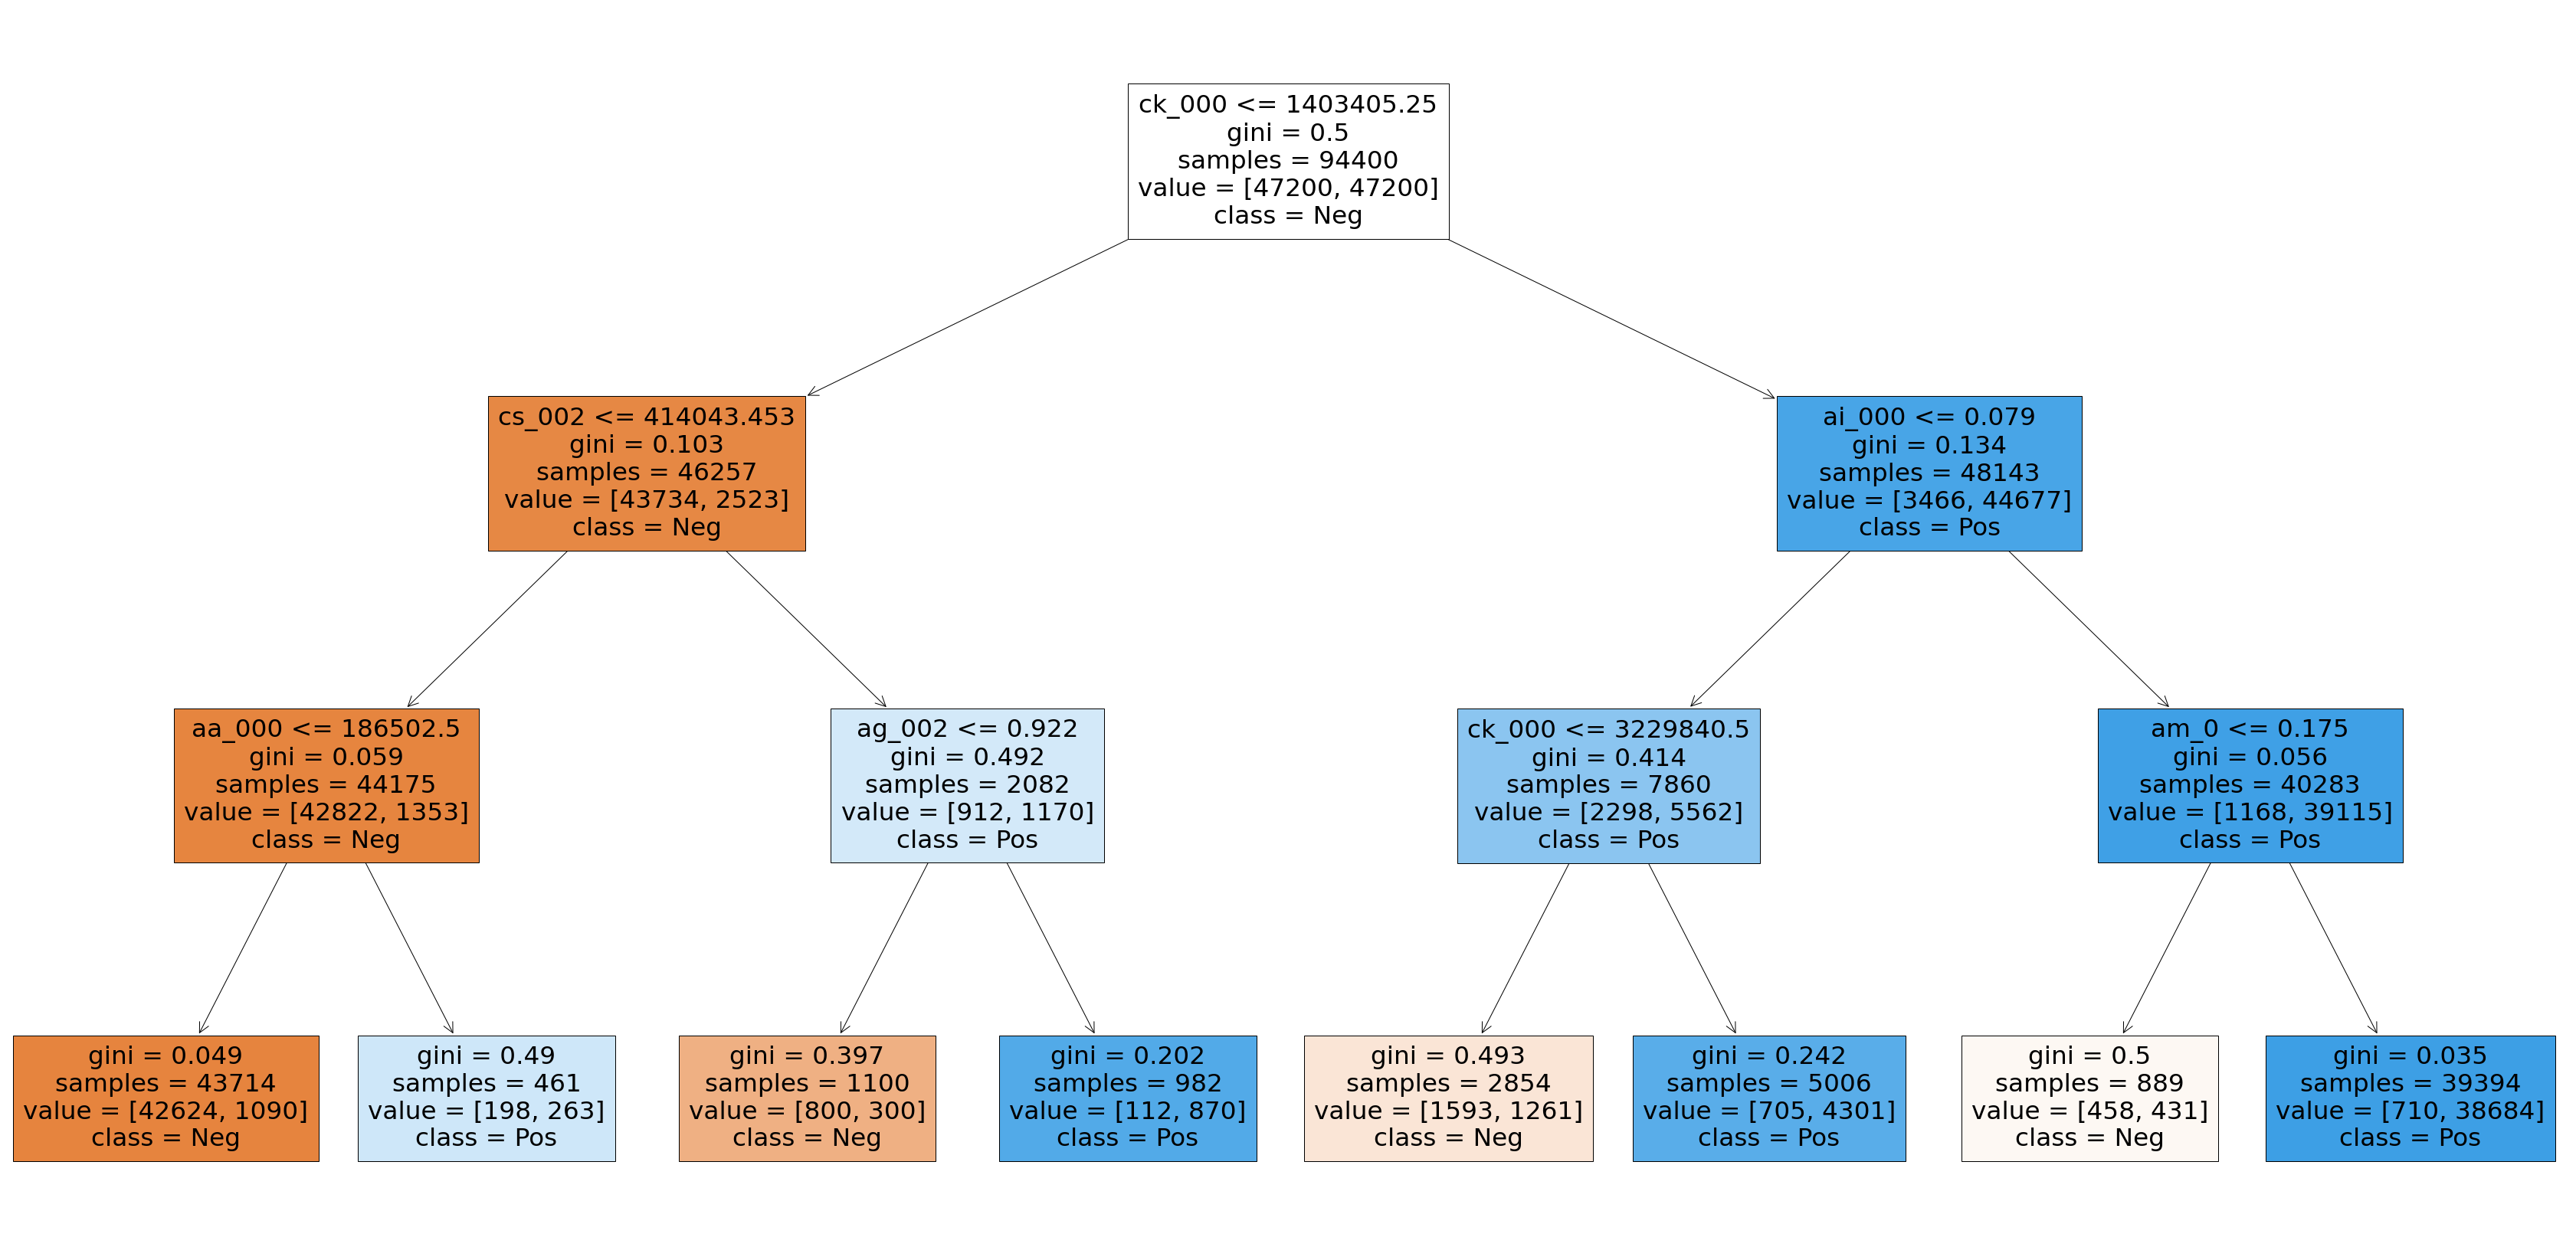

In [27]:
## visualisation
classifier = DecisionTreeClassifier(max_depth=3,random_state=RANDOM_NUMBER)
classifier.fit(X_train,y_train)

attribute_names=X_train.columns
label_names=np.array(["Neg", "Pos"])
fig = plt.figure(figsize=(60,30))
tree.plot_tree(classifier, 
                   feature_names =attribute_names,  
                   class_names=label_names,
                   filled=True)
plt.show()

# <b>2.6.2 <span style='color:red'>|</span> Total impurity of leaves vs effective alphas of pruned tree </b> <a class="anchor" id="2.6.1"></a>

Low cost and complexity recursive pruning identifies the node with the "weakest link." An effective alpha, where the nodes with the smallest effective alpha are pruned first, identifies the weakest link. Scikit-learn offers DecisionTreeClassifier.cost complexity pruning path, which returns the effective alphas and the accompanying total leaf impurity at each stage of the pruning process, so users can get an idea of what values of ccp alpha would be suitable. More of the tree gets pruned as alpha rises, which raises the overall impurity of the leaves.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

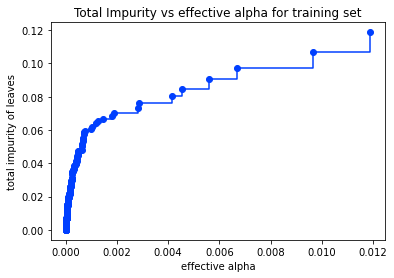

In [28]:
classifier_max = DecisionTreeClassifier(max_depth=None,random_state=RANDOM_NUMBER)
path = classifier_max.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


# <b>3.0 <span style='color:red'>|</span> Evaluate on Unseen Imported Test Set </b> <a class="anchor" id="3.0"></a>

# <b>3.1 <span style='color:red'>|</span> Test Set Pre-processing </b> <a class="anchor" id="3.1"></a>

One need to apply back the similar pre-processing techniques in the training set back to the testing set. This is to ensure the fitted model on the training set is able to predict the unseen testing data

In [29]:
best_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
test = pd.read_csv("aps_failure_test_set.csv", skiprows=20)

def data_preprocessing(test):
    test.replace("na", np.nan, inplace=True)
    
    test = test.drop(to_drop_columns, axis=1)
    test = test.drop(normal_col, axis=1)
    X = test.drop('class', axis=1)
    Y = test[['class']]
    
    CAT = X[CATEGORICAL]
    CAT = CAT.fillna(CAT.mode().iloc[0])
    CAT = CAT.astype(int)
    
    NUMERICAL = X.drop(CATEGORICAL, axis=1)
    NUMERICAL = NUMERICAL.fillna(NUMERICAL.median())
    
    df3 = NUMERICAL.join(CAT)
    df4 = Y.join(df3)
    
    # label encoding
    df4['class'] = le.transform(df4['class'].values.ravel())
    
    # extract X Y
    X, Y = extract_X_y(df4, 'class')
    
    # scalling
    X_scaled = (X-X.mean())/X.std()
    
    # dimensionality reduction
    X_scaled_dim = X[feature_name]
    
    return X_scaled_dim, Y

X_scaled_dim_test_unseen, Y_test_unseen = data_preprocessing(test)

C:\Users\Lee Kah Win\anaconda3\envs\python r new\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


# <b>3.2 <span style='color:red'>|</span> Test Set Prediction Performance </b> <a class="anchor" id="3.1"></a>
Finally, here is the final performance of test set prediction performance

In [30]:
test_predict(best_classifier, 
             X_train,
             X_scaled_dim_test_unseen,
             y_train,
             Y_test_unseen)

duration running: 0:00:30.607729


,model,metric,test predict score (20% data)
0,"(DecisionTreeClassifier(max_features='auto', r...",accuracy_score,0.990000
1,"(DecisionTreeClassifier(max_features='auto', r...",precision_score,0.764128
2,"(DecisionTreeClassifier(max_features='auto', r...",recall_score,0.829333
3,"(DecisionTreeClassifier(max_features='auto', r...",f1_score,0.795396
4,"(DecisionTreeClassifier(max_features='auto', r...",roc_auc_score,0.911595


In [31]:
from sklearn.metrics import classification_report
def get_class_report(model,X_train,X_test,y_train,y_test):
    startTime = datetime.now()
    
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    
    target_names = ['Negative', 'Positive']
    
    print(classification_report(y_test, prediction_test, target_names=target_names))
    print(f"duration running: {datetime.now() - startTime}")

get_class_report(best_classifier,
                 X_train,X_scaled_dim_test_unseen,
                 y_train,
                 Y_test_unseen)

              precision    recall  f1-score   support

    Negative       1.00      0.99      0.99     15625
    Positive       0.76      0.83      0.80       375

    accuracy                           0.99     16000
   macro avg       0.88      0.91      0.90     16000
weighted avg       0.99      0.99      0.99     16000

duration running: 0:00:30.420752


To: Boost
<br>
From: Morris Lee
<br>
Date: 6 Jan 2023
<br>
Subject: ASSIGNMENT FOR TECHNICAL INTERVIEW (DATA SCIENCE)